# Portfolio with the Maximum Sortino Ratio for the Pharma Sector

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['SUNPHARMA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'GLAND.NS', 'CIPLA.NS', 'LUPIN.NS',
         'LAURUSLABS.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'ALKEM.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [4]:
df.to_csv("pharma.csv")

In [2]:
df = pd.read_csv("pharma.csv", index_col=0)

In [3]:
df.head()

SUNPHARMA.NS   DRREDDY.NS  DIVISLAB.NS    CIPLA.NS     LUPIN.NS  \
Date                                                                          
2017-01-02    611.253174  2936.205078   765.529541  553.532349  1459.425049   
2017-01-03    613.229370  2925.730469   746.339661  561.013855  1459.182739   
2017-01-04    614.434448  2943.728027   721.824707  555.732727  1443.190430   
2017-01-05    620.315186  2986.532227   733.050720  567.077209  1465.579712   
2017-01-06    617.712280  3008.339600   707.528381  570.011169  1465.531128   

            LAURUSLABS.NS  AUROPHARMA.NS   BIOCON.NS     ALKEM.NS  
Date                                                               
2017-01-02      92.112083     659.225647  157.706650  1559.066284  
2017-01-03      90.208870     656.005127  156.604965  1590.684937  
2017-01-04      90.047897     650.881714  154.716354  1602.409668  
2017-01-05      90.208870     669.716614  156.754059  1597.219971  
2017-01-06      89.527122     675.718506  158.965729  1595.249634

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  \
Date                                                                    
2017-01-03      0.003228   -0.003574    -0.025387  0.013425 -0.000166   
2017-01-04      0.001963    0.006133    -0.033398 -0.009458 -0.011020   
2017-01-05      0.009525    0.014436     0.015433  0.020208  0.015395   
2017-01-06     -0.004205    0.007275    -0.035437  0.005160 -0.000033   
2017-01-09     -0.013671   -0.031823    -0.004417 -0.010608 -0.015026   
...                  ...         ...          ...       ...       ...   
2021-12-27      0.011016    0.020960     0.005818  0.023879  0.020616   
2021-12-28      0.026101    0.001456     0.011591  0.003273  0.000164   
2021-12-29      0.028662    0.018660     0.021046  0.002408  0.014083   
2021-12-30     -0.005199    0.014696     0.001362  0.018218  0.008836   
2021-12-31      0.013392    0.000469     0.010810 -0.009120  0.013661   

            LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
Date                                                           
2017-01-03      -0.020878      -0.004897  -0.007010  0.020078  
2017-01-04      -0.001786      -0.007841  -0.012133  0.007344  
2017-01-05       0.001786       0.028527   0.013085 -0.003244  
2017-01-06      -0.007586       0.008922   0.014011 -0.001234  
2017-01-09       0.005379       0.003100   0.054750  0.012751  
...                   ...            ...        ...       ...  
2021-12-27       0.034483       0.024608   0.005627  0.004181  
2021-12-28       0.018603      -0.001171  -0.001404  0.002758  
2021-12-29       0.035743       0.002479   0.015887  0.009339  
2021-12-30      -0.018966      -0.004895  -0.000692  0.029757  
2021-12-31       0.001764       0.014885   0.008953  0.000014  

[1235 rows x 9 columns]

In [5]:
assets = ['SUNPHARMA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'LUPIN.NS',
         'LAURUSLABS.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'ALKEM.NS']
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 9)

In [7]:
df.head()

SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  \
Date                                                                    
2017-01-03      0.003228   -0.003574    -0.025387  0.013425 -0.000166   
2017-01-04      0.001963    0.006133    -0.033398 -0.009458 -0.011020   
2017-01-05      0.009525    0.014436     0.015433  0.020208  0.015395   
2017-01-06     -0.004205    0.007275    -0.035437  0.005160 -0.000033   
2017-01-09     -0.013671   -0.031823    -0.004417 -0.010608 -0.015026   

            LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
Date                                                           
2017-01-03      -0.020878      -0.004897  -0.007010  0.020078  
2017-01-04      -0.001786      -0.007841  -0.012133  0.007344  
2017-01-05       0.001786       0.028527   0.013085 -0.003244  
2017-01-06      -0.007586       0.008922   0.014011 -0.001234  
2017-01-09       0.005379       0.003100   0.054750  0.012751

In [8]:
df_training = df[0:987]
df_training.columns

Index(['SUNPHARMA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'LUPIN.NS',
       'LAURUSLABS.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'ALKEM.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 9)

In [10]:
df_training.tail()

SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  \
Date                                                                    
2020-12-24      0.027211   -0.004278     0.016402  0.010315  0.013251   
2020-12-28     -0.005945    0.000000     0.004364 -0.003667  0.007704   
2020-12-29      0.006199   -0.006983     0.004821 -0.002654 -0.006629   
2020-12-30     -0.011238    0.001035     0.004088 -0.005025  0.000358   
2020-12-31      0.014197    0.006583     0.011045 -0.004684 -0.000767   

            LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
Date                                                           
2020-12-24       0.011551       0.021910  -0.003418  0.015500  
2020-12-28      -0.001293      -0.000715  -0.034084  0.000309  
2020-12-29      -0.005188      -0.003640  -0.011443  0.002876  
2020-12-30       0.011493       0.001877  -0.003916  0.001076  
2020-12-31       0.008817       0.015919   0.014501 -0.000769

In [11]:
df_test= df[987:]
df_test.head()

SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  \
Date                                                                    
2021-01-01      0.006562    0.006940     0.001859  0.008077  0.024322   
2021-01-04      0.013576    0.005878     0.003424  0.006812  0.025694   
2021-01-05     -0.001573    0.002775    -0.005231 -0.006026  0.012579   
2021-01-06      0.003061    0.000265     0.009777 -0.002966 -0.038573   
2021-01-07     -0.005633   -0.003296    -0.019993  0.002119  0.021406   

            LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
Date                                                           
2021-01-01       0.000708       0.006977   0.000752  0.008355  
2021-01-04       0.016557       0.040143   0.002680  0.005559  
2021-01-05       0.000696       0.013984   0.001391  0.005663  
2021-01-06      -0.010765      -0.010779  -0.017037  0.000151  
2021-01-07      -0.007053      -0.011836  -0.010825  0.007694

In [12]:
df_test.shape

(248, 9)

In [15]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0     0.028841     0.021701   0.025332             1.167321  0.407391   
1     0.086760     0.067220   0.072616             1.080270  0.993153   
2     0.008417     0.045231   0.045582             1.007763 -0.256089   
3     0.022841     0.058680   0.057670             0.982798  0.048416   
4     0.027937     0.058940   0.058301             0.989158  0.134670   
...        ...          ...        ...                  ...       ...   
9995  0.057126     0.063476   0.065343             1.029412  0.584872   
9996  0.114837     0.089636   0.097003             1.082184  1.058017   
9997  0.077325     0.052398   0.055865             1.066165  1.094030   
9998  0.064119     0.066714   0.067272             1.008358  0.661318   
9999  0.060797     0.064645   0.068362             1.057501  0.631097   

      SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  \
0         0.005892    0.075657     0.043871  0.069652  0.036609   
1         0.066592    0.148127     0.161094  0.128234  0.057339   
2         0.164242    0.056739     0.004986  0.061466  0.216031   
3         0.208710    0.029555     0.050795  0.171391  0.060983   
4         0.201603    0.033428     0.061656  0.062618  0.173390   
...            ...         ...          ...       ...       ...   
9995      0.154746    0.080686     0.114913  0.150090  0.001101   
9996      0.091295    0.200066     0.211908  0.073202  0.044514   
9997      0.010022    0.107052     0.151006  0.081892  0.150607   
9998      0.160414    0.047252     0.143793  0.228130  0.104002   
9999      0.142307    0.116073     0.111131  0.097113  0.050817   

      LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
0          0.193406       0.151815   0.223470  0.199628  
1          0.155986       0.018498   0.156587  0.107543  
2          0.014956       0.213425   0.060829  0.207325  
3          0.111039       0.261810   0.104674  0.001043  
4          0.183228       0.146699   0.127735  0.009642  
...             ...            ...        ...       ...  
9995       0.174877       0.077892   0.113653  0.132041  
9996       0.071792       0.164218   0.088114  0.054891  
9997       0.143262       0.155907   0.041808  0.158444  
9998       0.023899       0.087354   0.134331  0.070823  
9999       0.042952       0.166591   0.145937  0.127079  

[10000 rows x 14 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0  0.028841     0.021701   0.025332             1.167321  0.407391   
1  0.086760     0.067220   0.072616             1.080270  0.993153   
2  0.008417     0.045231   0.045582             1.007763 -0.256089   
3  0.022841     0.058680   0.057670             0.982798  0.048416   
4  0.027937     0.058940   0.058301             0.989158  0.134670   

   SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  LAURUSLABS.NS  \
0      0.005892    0.075657     0.043871  0.069652  0.036609       0.193406   
1      0.066592    0.148127     0.161094  0.128234  0.057339       0.155986   
2      0.164242    0.056739     0.004986  0.061466  0.216031       0.014956   
3      0.208710    0.029555     0.050795  0.171391  0.060983       0.111039   
4      0.201603    0.033428     0.061656  0.062618  0.173390       0.183228   

   AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
0       0.151815   0.223470  0.199628  
1       0.018498   0.156587  0.107543  
2       0.213425   0.060829  0.207325  
3       0.261810   0.104674  0.001043  
4       0.146699   0.127735  0.009642

In [13]:
df.head()

SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  \
Date                                                                    
2017-01-03      0.003228   -0.003574    -0.025387  0.013425 -0.000166   
2017-01-04      0.001963    0.006133    -0.033398 -0.009458 -0.011020   
2017-01-05      0.009525    0.014436     0.015433  0.020208  0.015395   
2017-01-06     -0.004205    0.007275    -0.035437  0.005160 -0.000033   
2017-01-09     -0.013671   -0.031823    -0.004417 -0.010608 -0.015026   

            LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
Date                                                           
2017-01-03      -0.020878      -0.004897  -0.007010  0.020078  
2017-01-04      -0.001786      -0.007841  -0.012133  0.007344  
2017-01-05       0.001786       0.028527   0.013085 -0.003244  
2017-01-06      -0.007586       0.008922   0.014011 -0.001234  
2017-01-09       0.005379       0.003100   0.054750  0.012751

In [14]:
df_training = df[0:987]
df_training.columns

Index(['SUNPHARMA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'LUPIN.NS',
       'LAURUSLABS.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'ALKEM.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 9)

In [16]:
df_test= df[987:]
df_test.head()

SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  \
Date                                                                    
2021-01-01      0.006562    0.006940     0.001859  0.008077  0.024322   
2021-01-04      0.013576    0.005878     0.003424  0.006812  0.025694   
2021-01-05     -0.001573    0.002775    -0.005231 -0.006026  0.012579   
2021-01-06      0.003061    0.000265     0.009777 -0.002966 -0.038573   
2021-01-07     -0.005633   -0.003296    -0.019993  0.002119  0.021406   

            LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
Date                                                           
2021-01-01       0.000708       0.006977   0.000752  0.008355  
2021-01-04       0.016557       0.040143   0.002680  0.005559  
2021-01-05       0.000696       0.013984   0.001391  0.005663  
2021-01-06      -0.010765      -0.010779  -0.017037  0.000151  
2021-01-07      -0.007053      -0.011836  -0.010825  0.007694

In [17]:
df_test.shape

(248, 9)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.146108
Downside SD            0.095320
Upside SD              0.095850
Volatility Skewness    1.005559
Sortino                1.322994
SUNPHARMA.NS           0.006447
DRREDDY.NS             0.047879
DIVISLAB.NS            0.339055
CIPLA.NS               0.025431
LUPIN.NS               0.077734
LAURUSLABS.NS          0.107186
AUROPHARMA.NS          0.133206
BIOCON.NS              0.001547
ALKEM.NS               0.261514
Name: 7738, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                   0.005524
Downside SD            0.004266
Upside SD              0.004404
Volatility Skewness    1.032357
Sortino               -3.393190
SUNPHARMA.NS           0.005023
DRREDDY.NS             0.005680
DIVISLAB.NS            0.011590
CIPLA.NS               0.129558
LUPIN.NS               0.148153
LAURUSLABS.NS          0.137098
AUROPHARMA.NS          0.148900
BIOCON.NS              0.220809
ALKEM.NS               0.193189
Name: 1398, dtype: float64

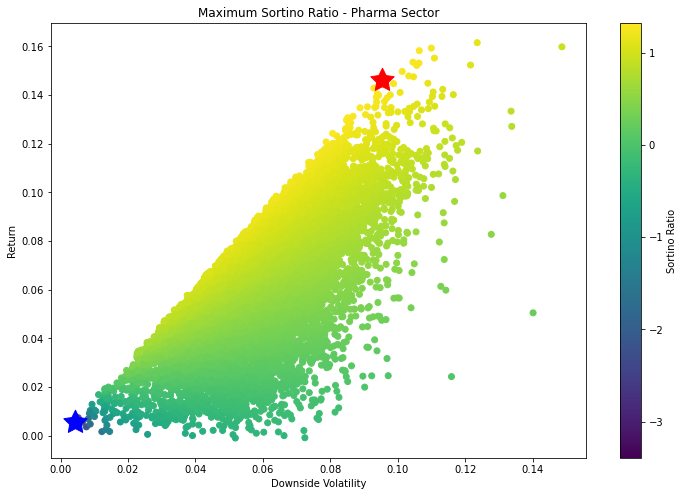

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - Pharma Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [18]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.0055, 0.0182, 0.2526, 0.2039, 0.0147, 0.2319, 0.0567, 0.0190, 0.1976]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['SUNPHARMA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'LUPIN.NS',
         'LAURUSLABS.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'ALKEM.NS'])
w_1.columns = ['weights']
w_1

[0.0055, 0.0182, 0.2526, 0.2039, 0.0147, 0.2319, 0.0567, 0.019, 0.1976]


weights
SUNPHARMA.NS    0.0055
DRREDDY.NS      0.0182
DIVISLAB.NS     0.2526
CIPLA.NS        0.2039
LUPIN.NS        0.0147
LAURUSLABS.NS   0.2319
AUROPHARMA.NS   0.0567
BIOCON.NS       0.0190
ALKEM.NS        0.1976

In [19]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.0064, 0.0479, 0.3391, 0.0254, 0.0777, 0.1072, 0.1332, 0.0015, 0.2615]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['SUNPHARMA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'LUPIN.NS',
         'LAURUSLABS.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'ALKEM.NS'])
w_2.columns = ['weights']
w_2

weights
SUNPHARMA.NS    0.0064
DRREDDY.NS      0.0479
DIVISLAB.NS     0.3391
CIPLA.NS        0.0254
LUPIN.NS        0.0777
LAURUSLABS.NS   0.1072
AUROPHARMA.NS   0.1332
BIOCON.NS       0.0015
ALKEM.NS        0.2615

In [20]:
w_raw = [0.0002, 0.0288, 0.2531, 0.0590, 0.2393, 0.0107, 0.2665, 0.1282, 0.0141]
w_3 = pd.DataFrame (w_raw, index = ['SUNPHARMA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'LUPIN.NS',
         'LAURUSLABS.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'ALKEM.NS'])
w_3.columns = ['weight']
w_3

weight
SUNPHARMA.NS   0.0002
DRREDDY.NS     0.0288
DIVISLAB.NS    0.2531
CIPLA.NS       0.0590
LUPIN.NS       0.2393
LAURUSLABS.NS  0.0107
AUROPHARMA.NS  0.2665
BIOCON.NS      0.1282
ALKEM.NS       0.0141

In [21]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
SUNPHARMA.NS         0.0055         0.0064        0.0002
DRREDDY.NS           0.0182         0.0479        0.0288
DIVISLAB.NS          0.2526         0.3391        0.2531
CIPLA.NS             0.2039         0.0254        0.0590
LUPIN.NS             0.0147         0.0777        0.2393
LAURUSLABS.NS        0.2319         0.1072        0.0107
AUROPHARMA.NS        0.0567         0.1332        0.2665
BIOCON.NS            0.0190         0.0015        0.1282
ALKEM.NS             0.1976         0.2615        0.0141

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

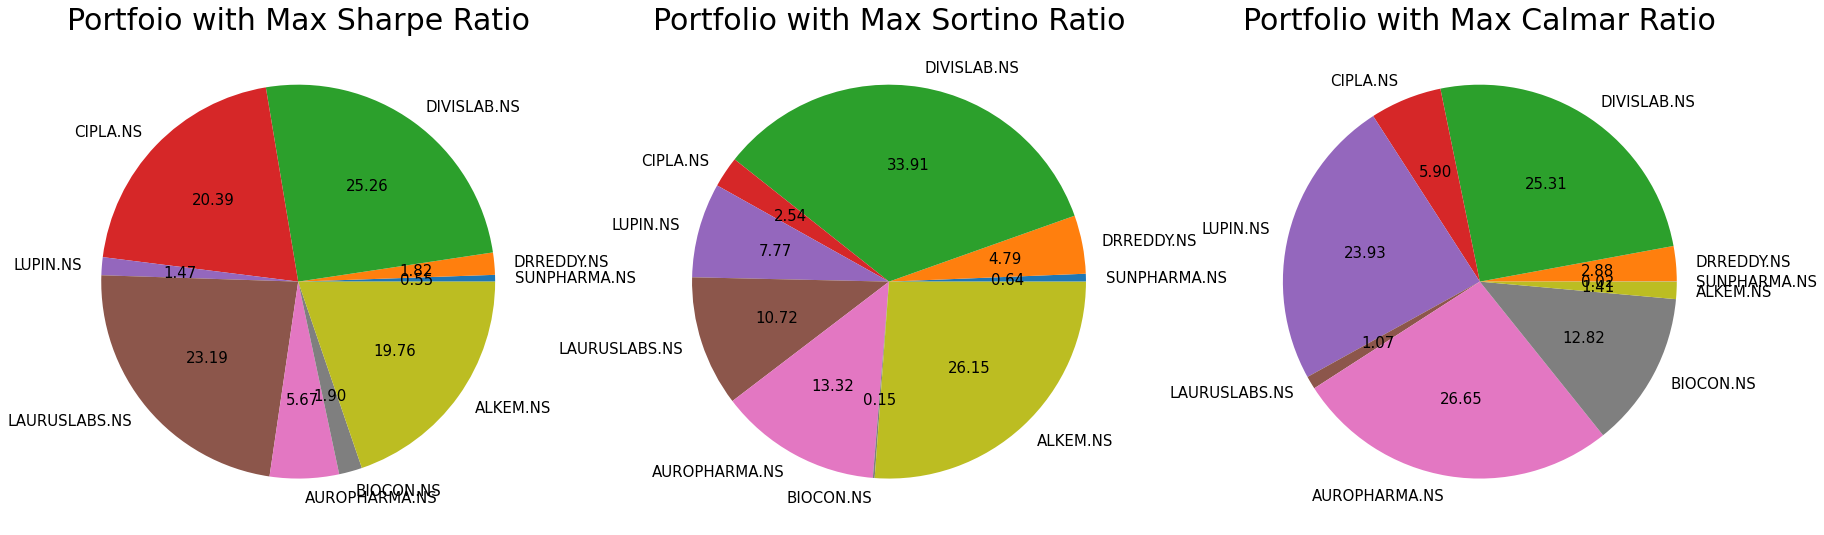

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct = '%.2f', textprops = {'fontsize': 15})
ax3.set_title('Portfolio with Max Calmar Ratio', fontsize = 30)
#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [23]:
df_training.shape

(987, 9)

In [24]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio'], index = df_test.index)

In [25]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                   -0.005010                    -0.006082   
2017-01-04                   -0.010043                    -0.011449   
2017-01-05                    0.010199                     0.010858   
2017-01-06                   -0.009021                    -0.011493   
2017-01-09                    0.000829                    -0.000141   
2017-01-10                    0.000410                     0.002888   
2017-01-11                    0.003924                     0.005088   
2017-01-12                    0.000401                    -0.005909   
2017-01-13                    0.011828                     0.010033   
2017-01-16                   -0.007571                    -0.008134   
2017-01-17                   -0.004413                    -0.002043   
2017-01-18                   -0.001664                     0.001449   
2017-01-19                   -0.002269                    -0.005627   
2017-01-20                   -0.011075                    -0.014142   
2017-01-23                   -0.011511                    -0.014619   
2017-01-24                    0.003239                     0.005294   
2017-01-25                   -0.001998                    -0.005458   
2017-01-27                    0.010907                     0.018347   
2017-01-30                   -0.001294                    -0.005646   
2017-01-31                   -0.004712                    -0.003932   

            Max Calmar Ratio  
Date                          
2017-01-03         -0.007919  
2017-01-04         -0.015032  
2017-01-05          0.018453  
2017-01-06         -0.004389  
2017-01-09          0.001824  
2017-01-10          0.001094  
2017-01-11          0.008591  
2017-01-12         -0.008019  
2017-01-13          0.005264  
2017-01-16         -0.000501  
2017-01-17         -0.001336  
2017-01-18          0.005607  
2017-01-19         -0.008890  
2017-01-20         -0.017624  
2017-01-23         -0.006546  
2017-01-24          0.010434  
2017-01-25          0.000185  
2017-01-27          0.010661  
2017-01-30         -0.007873  
2017-01-31         -0.012025

<AxesSubplot:xlabel='Date', ylabel='Return'>

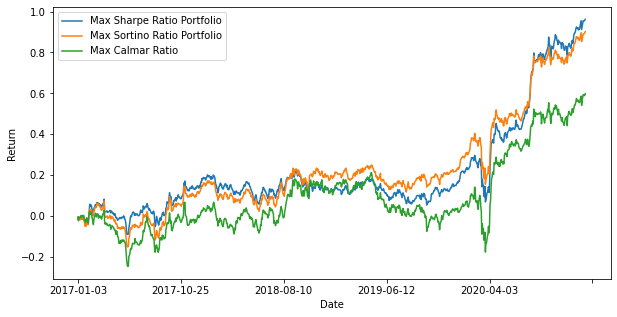

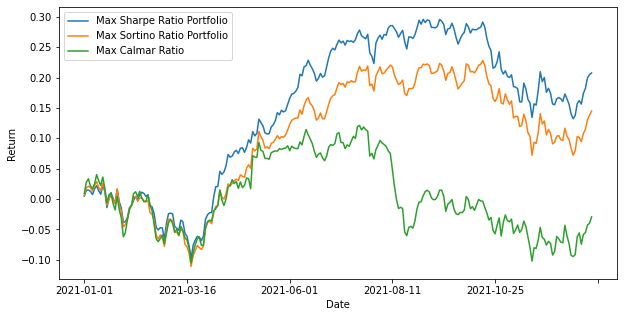

In [26]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [27]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.245542
Max Sortino Ratio Portfolio    0.230182
Max Calmar Ratio               0.152763
dtype: float64

In [28]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.210950
Max Sortino Ratio Portfolio    0.147113
Max Calmar Ratio              -0.029843
dtype: float64